In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [3]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [4]:
X = df.drop(["FLAG","CONS_NO"],axis=1)

In [5]:
X

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,0.062940,0.060357,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,0.345709,0.267194,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,0.101821,0.069536,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,0.255328,0.286365,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [6]:
y = df.FLAG

In [7]:
y

0        1
1        1
2        1
3        1
4        1
        ..
40251    0
40252    0
40253    0
40254    0
40255    0
Name: FLAG, Length: 40256, dtype: int64

In [8]:
model_grade = GradientBoostingClassifier()

In [9]:
model_grade.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Don't touch this place for inference

In [22]:
grid_grade = GridSearchCV(
estimator=GradientBoostingClassifier(verbose=1),
    param_grid={"max_depth":[2,3,4,5,6],
                
               },
    scoring={"precision": make_scorer(precision_score),
              "recall":make_scorer(recall_score),
              "f1_score":make_scorer(f1_score),
              "roc_auc_score":make_scorer(roc_auc_score),
            },
    refit="roc_auc_score",
    return_train_score=True,
    verbose=1,
    cv=3,
    n_jobs=-1
    
)

In [23]:
grid_grade.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
      Iter       Train Loss   Remaining Time 
         1           0.5804           35.78m
         2           0.5657           36.28m
         3           0.5541           35.40m
         4           0.5431           34.59m
         5           0.5350           34.05m
         6           0.5262           33.51m
         7           0.5185           32.98m
         8           0.5108           32.49m
         9           0.5049           32.29m
        10           0.4979           31.98m
        20           0.4541           28.21m
        30           0.4248           24.81m
        40           0.4032           21.18m
        50           0.3862           17.61m
        60           0.3715           14.13m
        70           0.3542           10.60m
        80           0.3413            7.06m
        90           0.3288            3.54m
       100           0.3203            0.00s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(verbose=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, refit='roc_auc_score',
             return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [24]:
results = pd.DataFrame(grid_grade.cv_results_)

In [25]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,...,split1_test_roc_auc_score,split2_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,651.632738,9.198623,0.296000,0.013443,2,{'max_depth': 2},0.800000,0.620690,0.789474,0.736721,...,0.507094,0.506123,0.506041,0.000895,5,0.504528,0.508050,0.507023,0.506534,0.001479
1,979.624364,19.770268,0.357002,0.024776,3,{'max_depth': 3},0.823529,0.604651,0.680000,0.702727,...,0.520403,0.520393,0.519344,0.001491,4,0.534541,0.538124,0.539156,0.537274,0.001978
2,1290.600666,50.332340,0.422709,0.046098,4,{'max_depth': 4},0.636364,0.672000,0.614173,0.640846,...,0.533529,0.530687,0.530639,0.002379,3,0.571402,0.570232,0.577694,0.573109,0.003277
3,1472.938815,35.686348,0.426790,0.076505,5,{'max_depth': 5},0.627737,0.591195,0.558442,0.592458,...,0.536738,0.533262,0.534653,0.001502,2,0.612373,0.620397,0.624629,0.619133,0.005083
4,1621.396938,35.809646,0.376160,0.048742,6,{'max_depth': 6},0.629213,0.584906,0.611429,0.608516,...,0.548371,0.542064,0.544892,0.002616,1,0.680412,0.683826,0.689505,0.684581,0.003750


## Using the different thing to using different techniques

## splitting data  80 @ 20

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [12]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier()

In [14]:
y_pred =model_grade.predict(x_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7350
           1       0.65      0.04      0.07       702

    accuracy                           0.91      8052
   macro avg       0.78      0.52      0.51      8052
weighted avg       0.89      0.91      0.88      8052



In [16]:
accuracy_score(y_test,y_pred)

0.9143070044709389

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @80
[[7336   14]
 [ 676   26]]
Normalized confusion matrix
[[0.99809524 0.00190476]
 [0.96296296 0.03703704]]


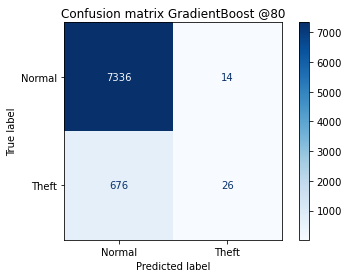

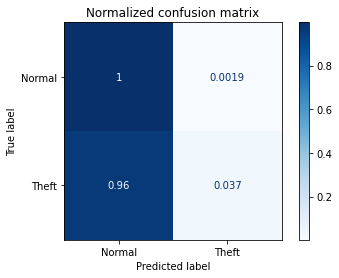

In [22]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [23]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

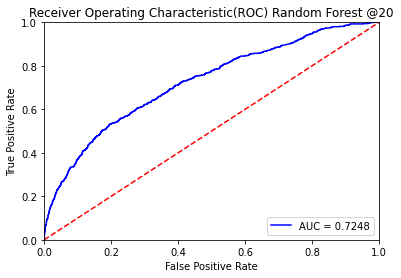

In [24]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## splitting at 60 @40

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40)

In [26]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier()

In [27]:
y_pred =model_grade.predict(x_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14694
           1       0.70      0.04      0.07      1409

    accuracy                           0.91     16103
   macro avg       0.81      0.52      0.51     16103
weighted avg       0.90      0.91      0.88     16103



In [29]:
accuracy_score(y_test,y_pred)

0.9143016829162268

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @60
[[14673    21]
 [ 1359    50]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99857085 0.00142915]
 [0.96451384 0.03548616]]


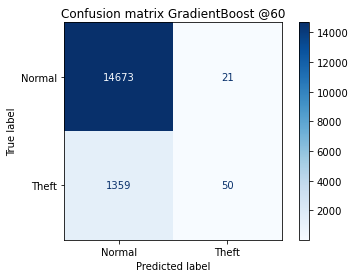

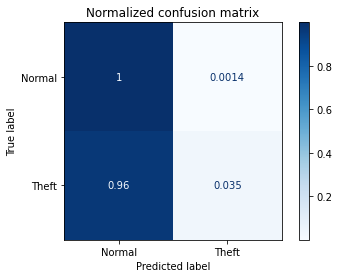

In [33]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [31]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

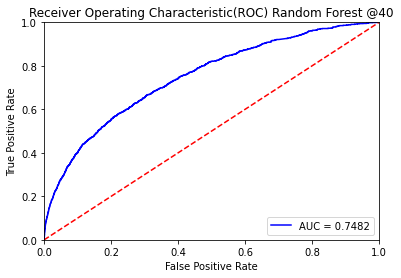

In [34]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @40")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## increasing max_depth

In [35]:
model_grade = GradientBoostingClassifier(max_depth=6)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40)

In [37]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=6)

In [38]:
y_pred =model_grade.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     14648
           1       0.55      0.08      0.14      1455

    accuracy                           0.91     16103
   macro avg       0.73      0.54      0.55     16103
weighted avg       0.88      0.91      0.88     16103



In [40]:
accuracy_score(y_test,y_pred)

0.91088617027883

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @60
[[14547   101]
 [ 1334   121]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99310486 0.00689514]
 [0.91683849 0.08316151]]


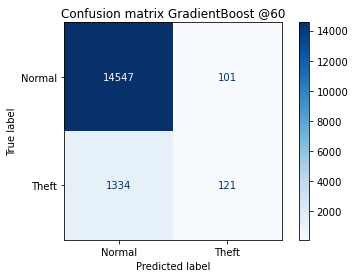

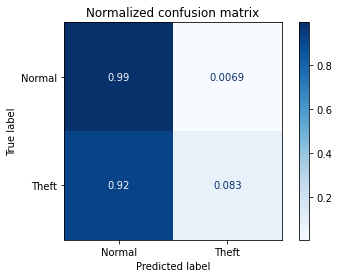

In [41]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [42]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

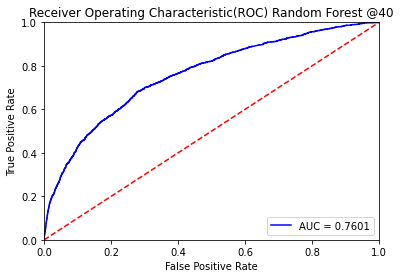

In [43]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @40")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### classifying using SMOTE to handle imbalance

#### imbalance and also splitting by @20

In [44]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [45]:
model_grade = GradientBoostingClassifier(max_depth=10)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [47]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=10)

In [48]:
y_pred =model_grade.predict(x_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7384
           1       0.90      0.48      0.63      1419

    accuracy                           0.91      8803
   macro avg       0.90      0.74      0.79      8803
weighted avg       0.91      0.91      0.90      8803



In [50]:
accuracy_score(y_test,y_pred)

0.9078723162558219

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @60
[[7309   75]
 [ 736  683]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.9898429  0.0101571 ]
 [0.51867512 0.48132488]]


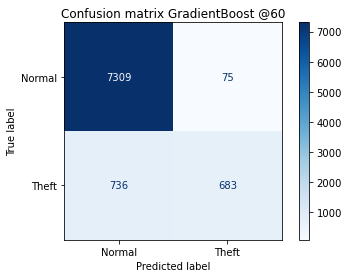

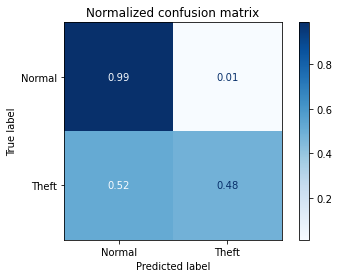

In [51]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [52]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

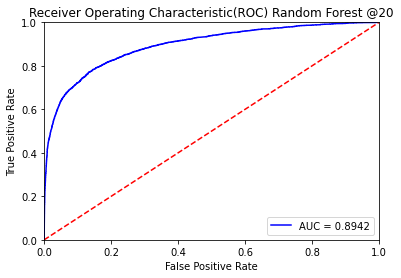

In [86]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

training @ 60

In [73]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.40)

In [74]:
model_grade = GradientBoostingClassifier(max_depth=10)

In [75]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=10)

In [76]:
y_pred =model_grade.predict(x_test)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     14629
           1       0.90      0.40      0.56      2976

    accuracy                           0.89     17605
   macro avg       0.90      0.70      0.75     17605
weighted avg       0.89      0.89      0.87     17605



In [78]:
accuracy_score(y_test,y_pred)

0.8915080942913944

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @60
[[14502   127]
 [ 1783  1193]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99131861 0.00868139]
 [0.59912634 0.40087366]]


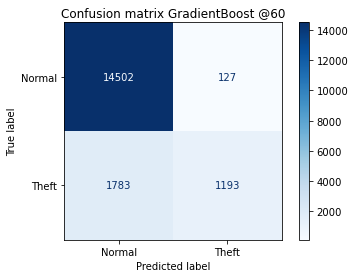

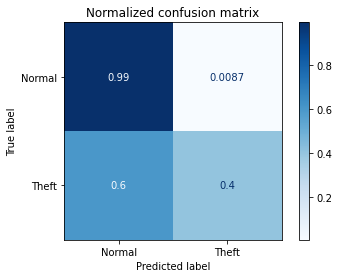

In [79]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [80]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

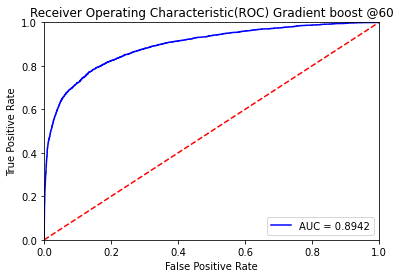

In [82]:
plt.title("Receiver Operating Characteristic(ROC) Gradient boost @60")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## implementing with higher max_depth the higher 

In [54]:
model_grade = GradientBoostingClassifier(max_depth=50)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [56]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=50)

In [57]:
y_pred =model_grade.predict(x_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7305
           1       0.51      0.51      0.51      1498

    accuracy                           0.83      8803
   macro avg       0.71      0.71      0.71      8803
weighted avg       0.83      0.83      0.83      8803



In [59]:
accuracy_score(y_test,y_pred)

0.8338066568215381

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @60
[[6569  736]
 [ 727  771]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.89924709 0.10075291]
 [0.48531375 0.51468625]]


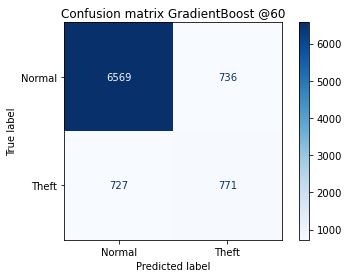

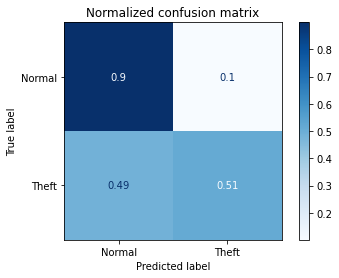

In [60]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [61]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

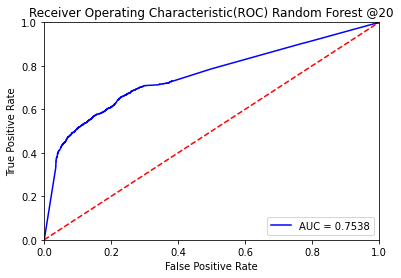

In [62]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## implementing gradient boost without my improvement

In [63]:
model_grade = GradientBoostingClassifier()

In [64]:
model_grade.fit(x_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred =model_grade.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      7305
           1       0.78      0.15      0.25      1498

    accuracy                           0.85      8803
   macro avg       0.82      0.57      0.58      8803
weighted avg       0.84      0.85      0.80      8803



In [67]:
accuracy_score(y_test,y_pred)

0.8478927638305124

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix GradientBoost @60
[[7244   61]
 [1278  220]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.99164956 0.00835044]
 [0.85313752 0.14686248]]


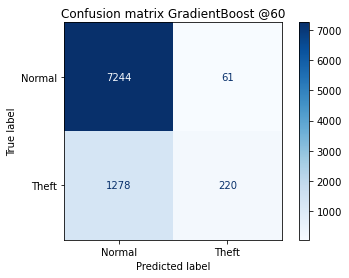

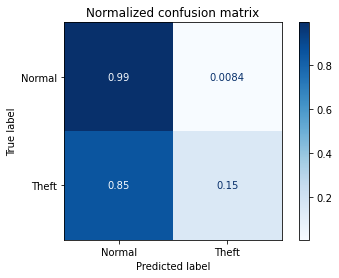

In [68]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix GradientBoost @60",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [69]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

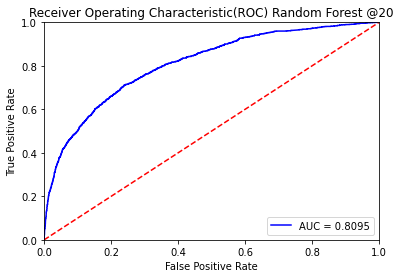

In [70]:
plt.title("Receiver Operating Characteristic(ROC) Random Forest @20")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()